In [15]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import os
import sys
from ipywidgets import widgets
from IPython.display import display, HTML
from IPython.display import clear_output
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Customized modules
HOME = '/home/serinatan/project/GPU-Virtualization-Benchmarks/util'
if HOME not in sys.path:
    sys.path.append(HOME)

import data.scripts.common.format as fmt
import data.scripts.common.constants as const
import data.scripts.gen_tables.gen_pair_configs as gen_pair
import data.scripts.gen_tables.gen_table_pair as gen_table_pair
import data.scripts.predict.predict_slowdown as predict

SCRIPT_PATH = os.path.join(HOME, 'data/scripts') 
PKL_PATH = os.path.join(HOME, 'data/pickles') 
CSV_PATH = os.path.join(HOME, 'data/csv')
GRAPH_PATH = os.path.join(HOME, 'data/graphs')

%config InlineBackend.figure_format ='retina'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
def draw_table(df, cols, hide_index=True):
    if hide_index:
        return df[cols].style.set_table_styles(fmt.table_style).hide_index()
    else:
        return df[cols].style.set_table_styles(fmt.table_style)

# Pair - dynamic

In [94]:
gen_pair = os.path.join(SCRIPT_PATH, 'gen_tables/gen_table_pair.py')
baseline = 'seq'
seq_pkl = os.path.join(PKL_PATH, 'seq.pkl')
intra_pkl = os.path.join(PKL_PATH, 'intra.pkl')
csv = os.path.join(HOME, 'data/csv/pair_dynamic.csv')
output = os.path.join(PKL_PATH, 'pair_dynamic.pkl')

%run $gen_pair --csv $csv --output $output --seq_pkl $seq_pkl --isolated_pkl $intra_pkl --qos 0.5

In [95]:
df_dynamic = pd.read_pickle(output)
print(df_dynamic.shape)

df_dynamic.sort_values(['1_bench', '2_bench'], inplace=True)
df_dynamic.reset_index(inplace=True, drop=True)

# FIXME: drop any rows with zero fairness
df_dynamic = df_dynamic[df_dynamic['fairness'] > 0]



(2317, 208)


In [93]:
col_dynamic = ['1_bench', '2_bench', '1_intra', '2_intra', 'ws', 'sld', 'config_sim', 'avg_dram_bw_x']
df_dynamic_display = df_dynamic[
    (df_dynamic['1_bench']=='cut_sgemm-1') & (df_dynamic['2_bench']=='nvd_blackscholes-0')]
df_dynamic_display = df_dynamic_display.sort_values(['1_intra', '2_intra'])
draw_table(df_dynamic_display, col_dynamic)

1_bench,2_bench,1_intra,2_intra,ws,sld,config_sim,avg_dram_bw_x
cut_sgemm-1,nvd_blackscholes-0,1,4,1.25424,"[0, 0.6144764449024849, 0.639763007331198]",V100-PAE-CONCURRENT-SEP_RW-LSRR-PRINT_DEVICE_SYNC-CAP_3201792_CYCLE-INTRA_0:1:4_CTA-ENABLE_L2D_1:1:1-MIX_0:1:1_KIDX-NUM_0:1:1_KERNEL,0.0652244
cut_sgemm-1,nvd_blackscholes-0,1,6,1.43967,"[0, 0.5941775364251929, 0.8454904181077455]",V100-PAE-CONCURRENT-SEP_RW-LSRR-PRINT_DEVICE_SYNC-CAP_3201792_CYCLE-INTRA_0:1:6_CTA-ENABLE_L2D_1:1:1-MIX_0:1:1_KIDX-NUM_0:1:1_KERNEL,0.0652244
cut_sgemm-1,nvd_blackscholes-0,1,8,1.48178,"[0, 0.5681767566574775, 0.9136073924213113]",V100-PAE-CONCURRENT-SEP_RW-LSRR-PRINT_DEVICE_SYNC-CAP_3201792_CYCLE-INTRA_0:1:8_CTA-ENABLE_L2D_1:1:1-MIX_0:1:1_KIDX-NUM_0:1:1_KERNEL,0.0652244


In [53]:
df_dynamic_show = df_dynamic.sort_values('ws', 
                                         ascending=False).drop_duplicates(['1_bench',
                                                                          '2_bench'])
df_dynamic_show[col_dynamic]

,1_bench,2_bench,1_intra,2_intra,ws,sld,config_sim,avg_dram_bw_x
463,nvd_binomial-0,parb_lbm-0,13.0,2.0,2.106919,"[0, 0.9794835653975781, 1.1274351339237392]",V100-PAE-CONCURRENT-SEP_RW-LSRR-PRINT_DEVICE_S...,0.000024
1815,parb_lbm-0,rod_lavamd-0,2.0,6.0,2.051409,"[0, 1.0665632777789866, 0.9848460818045853]",V100-PAE-CONCURRENT-SEP_RW-LSRR-PRINT_DEVICE_S...,0.603325
637,nvd_binomial-0,rod_heartwall-0,13.0,1.0,2.036187,"[0, 1.102623091150889, 0.9335640074737808]",V100-PAE-CONCURRENT-SEP_RW-LSRR-CAP_3606625_CY...,0.000024
550,nvd_binomial-0,parb_spmv-0,7.0,8.0,2.015484,"[0, 0.9168484284595751, 1.0986352692106878]",V100-PAE-CONCURRENT-SEP_RW-LSRR-PRINT_DEVICE_S...,0.000025
1513,parb_cutcp-0,parb_spmv-0,2.0,8.0,2.011420,"[0, 0.956847589561719, 1.0545723959678257]",V100-PAE-CONCURRENT-SEP_RW-LSRR-CAP_2007327_CY...,0.000010
1058,nvd_interval-0,parb_cutcp-0,6.0,2.0,1.995917,"[0, 1.0313510377723345, 0.9645662622668414]",V100-PAE-CONCURRENT-SEP_RW-LSRR-CAP_2007327_CY...,0.000065
1551,parb_cutcp-0,rod_heartwall-0,2.0,1.0,1.982135,"[0, 0.9965384997269523, 0.9855968873224692]",V100-PAE-CONCURRENT-SEP_RW-LSRR-CAP_2007327_CY...,0.000010
1601,parb_cutcp-0,rod_streamcluster-0,2.0,2.0,1.979888,"[0, 0.9842192680848978, 0.9956686919241936]",V100-PAE-CONCURRENT-SEP_RW-LSRR-PRINT_DEVICE_S...,0.000010
825,nvd_blackscholes-0,parb_cutcp-0,8.0,2.0,1.970186,"[0, 1.0199363036834486, 0.9502501869893297]",V100-PAE-CONCURRENT-SEP_RW-LSRR-PRINT_DEVICE_S...,0.779406
2197,rod_heartwall-0,rod_lavamd-0,1.0,6.0,1.967970,"[0, 0.8902873660567351, 1.0776823245259448]",V100-PAE-CONCURRENT-SEP_RW-LSRR-CAP_11767167_C...,0.000762


# Prediction Model

In [68]:
X, y = predict.prepare_datasets(df_dynamic)

In [69]:
offset = int(X.shape[0] * 0.8)
X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]

model = predict.train(X_train, y_train)

K-fold l1 error: 0.021858958068673655
K-fold l1 error: 0.02260789418561648
K-fold l1 error: 0.02028057220082082
K-fold l1 error: 0.02082154519045926
K-fold l1 error: 0.019769818982150175


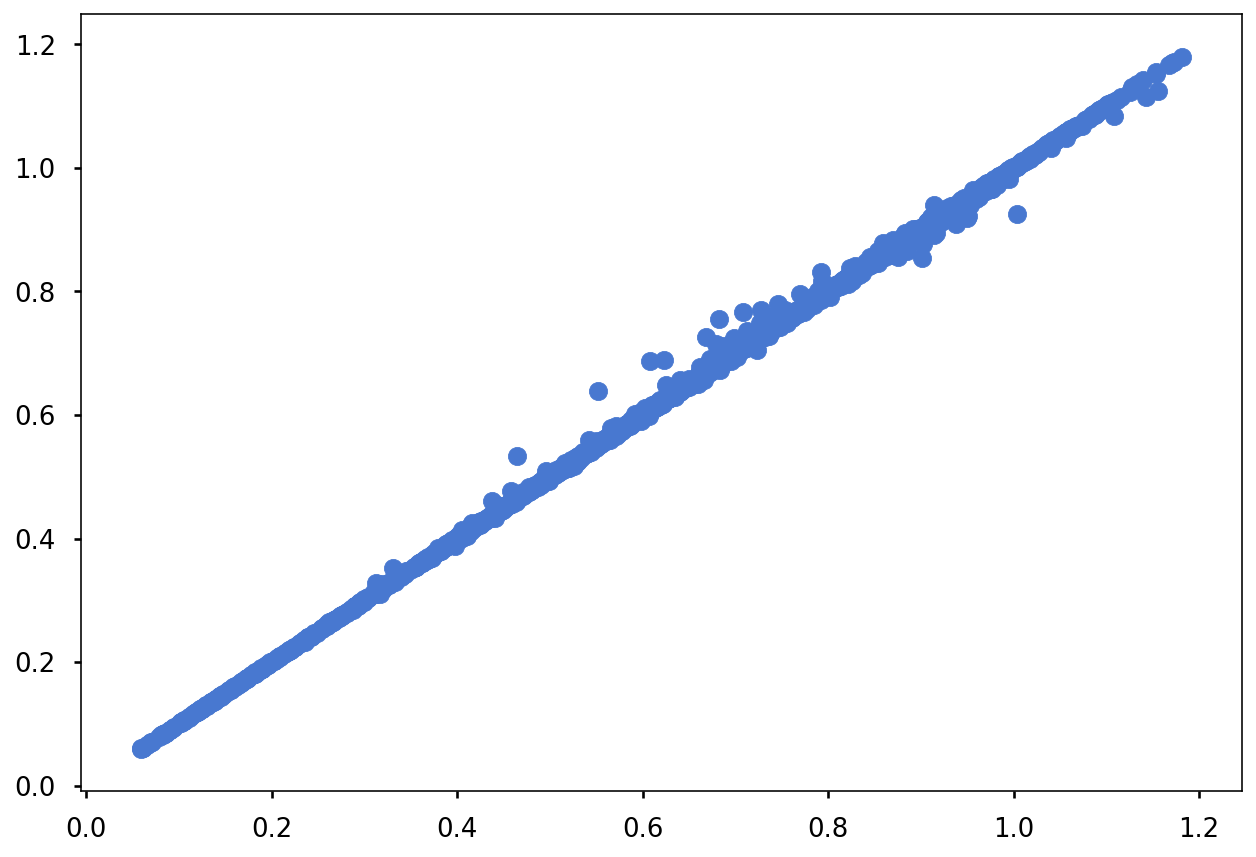

In [70]:
y_predict_train = model.predict(X_train)
plt.scatter(y_train, y_predict_train)
plt.plot(y_train, y_train)
plt.show()

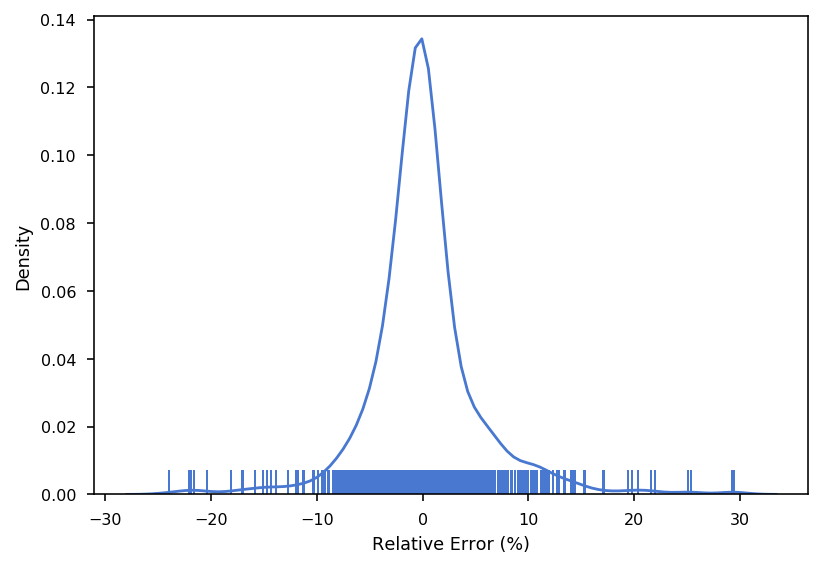

In [85]:
# get deltas
y_predicted = model.predict(X_test)
delta = (y_predicted - y_test)/y_test * 100

# fig = plt.figure(figsize=(16, 10))
plt.style.use('seaborn-paper')
sns.distplot(delta, hist=False, rug=True);
# sns.distplot(delta, bins=40, kde=False, rug=True);
plt.xlabel('Relative Error (%)')
plt.ylabel('Density')
# plt.title('Error Distribution')
# plt.show()
fig.savefig(os.path.join(HOME, 'data/graphs/grad_boosting_err_dist.pdf'), bbox_inches='tight')



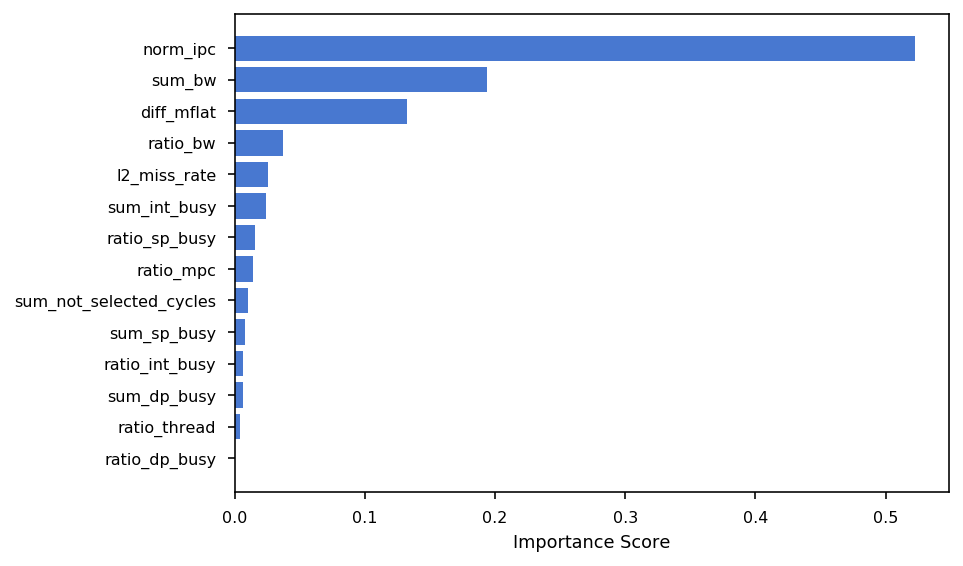

In [87]:
sns.set_palette(sns.color_palette("muted"))
predict.plot_importance(model)

In [160]:
# Feature set and idx
for idx, feature in enumerate(predict.cols_prefix):
    print(idx, feature)

0 norm_ipc
1 diff_mflat
2 ratio_mpc
3 ratio_bw
4 sum_bw
5 ratio_thread
6 ratio_sp_busy
7 sum_sp_busy
8 ratio_int_busy
9 sum_int_busy
10 sum_not_selected_cycles
11 ratio_dp_busy
12 sum_dp_busy


In [161]:
# Visualize the first tree
tree_path = os.path.join(GRAPH_PATH, 'tree.pdf')
predict.export_tree(model, tree_path, 0)

# Debug large errors

In [59]:
df_dynamic['1_predicted'] = predict.predict_from_df(model, df_dynamic, 'x')
df_dynamic['2_predicted'] = predict.predict_from_df(model, df_dynamic, 'y')

df_dynamic['1_delta'] = (df_dynamic['1_predicted'] - df_dynamic['1_sld'])
df_dynamic['2_delta'] = (df_dynamic['2_predicted'] - df_dynamic['2_sld'])

In [91]:
col_dynamic_seq = ['1_bench', '1_intra',
                   '2_bench', '2_intra',
                   '1_sld', '1_predicted',  #'1_infer', 
                   '1_delta',
                   '2_sld', '2_predicted',  #'2_infer', 
                   '2_delta',
                   'ws', 'fairness', 
                   'avg_dram_bw_x', 'avg_dram_bw_y', 'avg_mem_lat_x', 'avg_mem_lat_y',
                  ]
def highlight_error(s):
    is_high = np.abs(s) > 0.02
    return ['background-color: yellow' if v else '' for v in is_high]

# df_display = df_dynamic[(df_dynamic['1_bench']=='cut_sgemm-0') & \
#                         (df_dynamic['2_bench']=='nvd_blackscholes-0') #& \
#                        ].sort_values(['intra_x', 'intra_y'])

# df_display = df_dynamic[(np.absolute(df_dynamic['1_delta']) > 0.1) | (np.absolute(df_dynamic['2_delta']) > 0.15)]
df_display = df_dynamic[(df_dynamic['1_bench'] == 'parb_spmv-0') & (df_dynamic['2_bench'] == 'parb_stencil-0')]
print(len(df_display))
draw_table(df_display, 
           col_dynamic_seq, False).apply(highlight_error, subset=['1_delta', '2_delta'])

55


,1_bench,1_intra,2_bench,2_intra,1_sld,1_predicted,1_delta,2_sld,2_predicted,2_delta,ws,fairness,avg_dram_bw_x,avg_dram_bw_y,avg_mem_lat_x,avg_mem_lat_y
1876,parb_spmv-0,5,parb_stencil-0,6,0.406212,0.408549,0.00233654,0.464698,0.464289,-0.000409886,0.870911,0.874142,0.542844,0.496912,350,361
1877,parb_spmv-0,8,parb_stencil-0,6,0.525673,0.524779,-0.000893886,0.4,0.406946,0.00694614,0.925673,0.76093,0.755825,0.496912,392,361
1878,parb_spmv-0,12,parb_stencil-0,4,0.521625,0.526087,0.00446201,0.383205,0.38485,0.00164463,0.90483,0.734638,0.686944,0.402281,478,326
1879,parb_spmv-0,6,parb_stencil-0,9,0.391996,0.391556,-0.000440182,0.489025,0.485717,-0.00330779,0.881021,0.801588,0.644209,0.567712,357,427
1880,parb_spmv-0,4,parb_stencil-0,9,0.312301,0.321909,0.00960811,0.56059,0.560811,0.000220709,0.872891,0.557094,0.491869,0.567712,341,427
1881,parb_spmv-0,9,parb_stencil-0,7,0.421965,0.42429,0.00232437,0.489013,0.4866,-0.00241233,0.910978,0.862892,0.751387,0.5952,403,380
1882,parb_spmv-0,4,parb_stencil-0,4,0.43222,0.436003,0.00378271,0.402963,0.402746,-0.000216635,0.835183,0.93231,0.491869,0.402281,341,326
1883,parb_spmv-0,4,parb_stencil-0,7,0.330796,0.38412,0.0533231,0.572715,0.572012,-0.000703818,0.903512,0.577593,0.491869,0.5952,341,380
1884,parb_spmv-0,8,parb_stencil-0,5,0.520934,0.521311,0.000376568,0.418891,0.419008,0.000116995,0.939825,0.804115,0.755825,0.468003,392,340
1885,parb_spmv-0,4,parb_stencil-0,6,0.394182,0.39404,-0.000141275,0.496186,0.490971,-0.00521476,0.890368,0.794423,0.491869,0.496912,341,361


# Ordering accuracy

In [63]:
df_dynamic['ws_predicted'] = df_dynamic['1_predicted'] + df_dynamic['2_predicted']

keep_col = ['1_bench', '2_bench', 'ws', 'ws_predicted', '1_intra', '2_intra']
df_real_best = df_dynamic.sort_values('ws', ascending=False).drop_duplicates(['1_bench', '2_bench'])[keep_col]
df_predict_best = df_dynamic.sort_values('ws_predicted', ascending=False).drop_duplicates(['1_bench', '2_bench'])[keep_col]

In [67]:
# check how many pairs were predicted correctly in terms of best config
df_merged = pd.merge(df_real_best, df_predict_best, how='inner', on=['1_bench', '2_bench'])
print("Total pairs: ", len(df_merged.index))
df_correct = df_merged[(df_merged['1_intra_x'] == df_merged['1_intra_y']) & (df_merged['2_intra_x'] == df_merged['2_intra_y'])]
print("Correct pairs:", len(df_correct))

Total pairs:  168
Correct pairs: 138


# L2 partition worth it?

In [522]:
# read csv file unified-l2.csv
df_l2 = pd.read_csv(os.path.join(CSV_PATH, 'unified-l2.csv'))

# split pair into two benchmarks
pair = [re.split(r'-(?=\D)', p) for p in df_l2['pair_str']]
df_bench = pd.DataFrame(pair, columns=['1_bench', '2_bench'])
df_l2 = pd.concat([df_bench, df_l2], axis=1)

df_seq = pd.read_pickle(os.path.join(PKL_PATH, 'seq.pkl'))
df_l2 = gen_table_pair.evaluate_df_pair(df_l2, df_seq)

l2_keep_col = ['1_bench', '2_bench', '1_sld', '2_sld', 'ws', 'fairness']
df_yes_l2 = df_dynamic_show[l2_keep_col]
df_l2 = df_l2[l2_keep_col]

df_merge = pd.merge(df_l2, df_yes_l2, on=['1_bench', '2_bench'])
# draw_table(df_merge, df_merge.columns)

from scipy.stats import mstats
yes_ws = mstats.gmean(df_merge['ws_y'])
no_ws = mstats.gmean(df_merge['ws_x'])
yes_fair = mstats.gmean(df_merge['fairness_y'])
no_fair = mstats.gmean(df_merge['fairness_x'])

print(yes_ws, no_ws)
print(yes_fair, no_fair)

1.5916939808437316 1.5813796047349369
0.7997131123163216 0.8017260683214498


# Kernel Friendliness (Best WS)

In [83]:
subdf_1 = df_dynamic_show[['1_bench', '1_sld', '2_sld']].rename(
    columns={'1_bench':'Kernel', '1_sld':'Slowdown', '2_sld':'Slowdown (Other)'}).reset_index(drop=True)
print(subdf_1.head(5))
subdf_2 = df_dynamic_show[['2_bench', '2_sld', '1_sld']].rename(
    columns={'2_bench':'Kernel', '2_sld':'Slowdown', '1_sld':'Slowdown (Other)'}).reset_index(drop=True)

df_violin = pd.concat([subdf_1, subdf_2], axis=0)
df_violin = df_violin.sort_values('Kernel')

               Kernel  Slowdown  Slowdown (Other)
0      nvd_binomial-0  0.977654          1.062151
1      nvd_interval-0  1.058432          0.940004
2  nvd_blackscholes-0  1.013557          0.968685
3      nvd_interval-0  1.048262          0.923880
4         parb_spmv-0  1.001074          0.957624


In [84]:
# function to plot box plot
def my_boxplot(y_col, title):
    plt.figure(figsize=(16, 6))
    sns.scatterplot(x="Kernel", y=y_col, data=df_violin)
    ax = sns.boxplot(x="Kernel", y=y_col, data=df_violin)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.set_ylim([0, 1.2])
    ax.set_title(title, fontsize=16)
    ax.tick_params(labelsize=12)
    ax.set_ylabel(ax.get_ylabel(), fontsize=14)
    ax.xaxis.label.set_visible(False)
    
    plt.show()

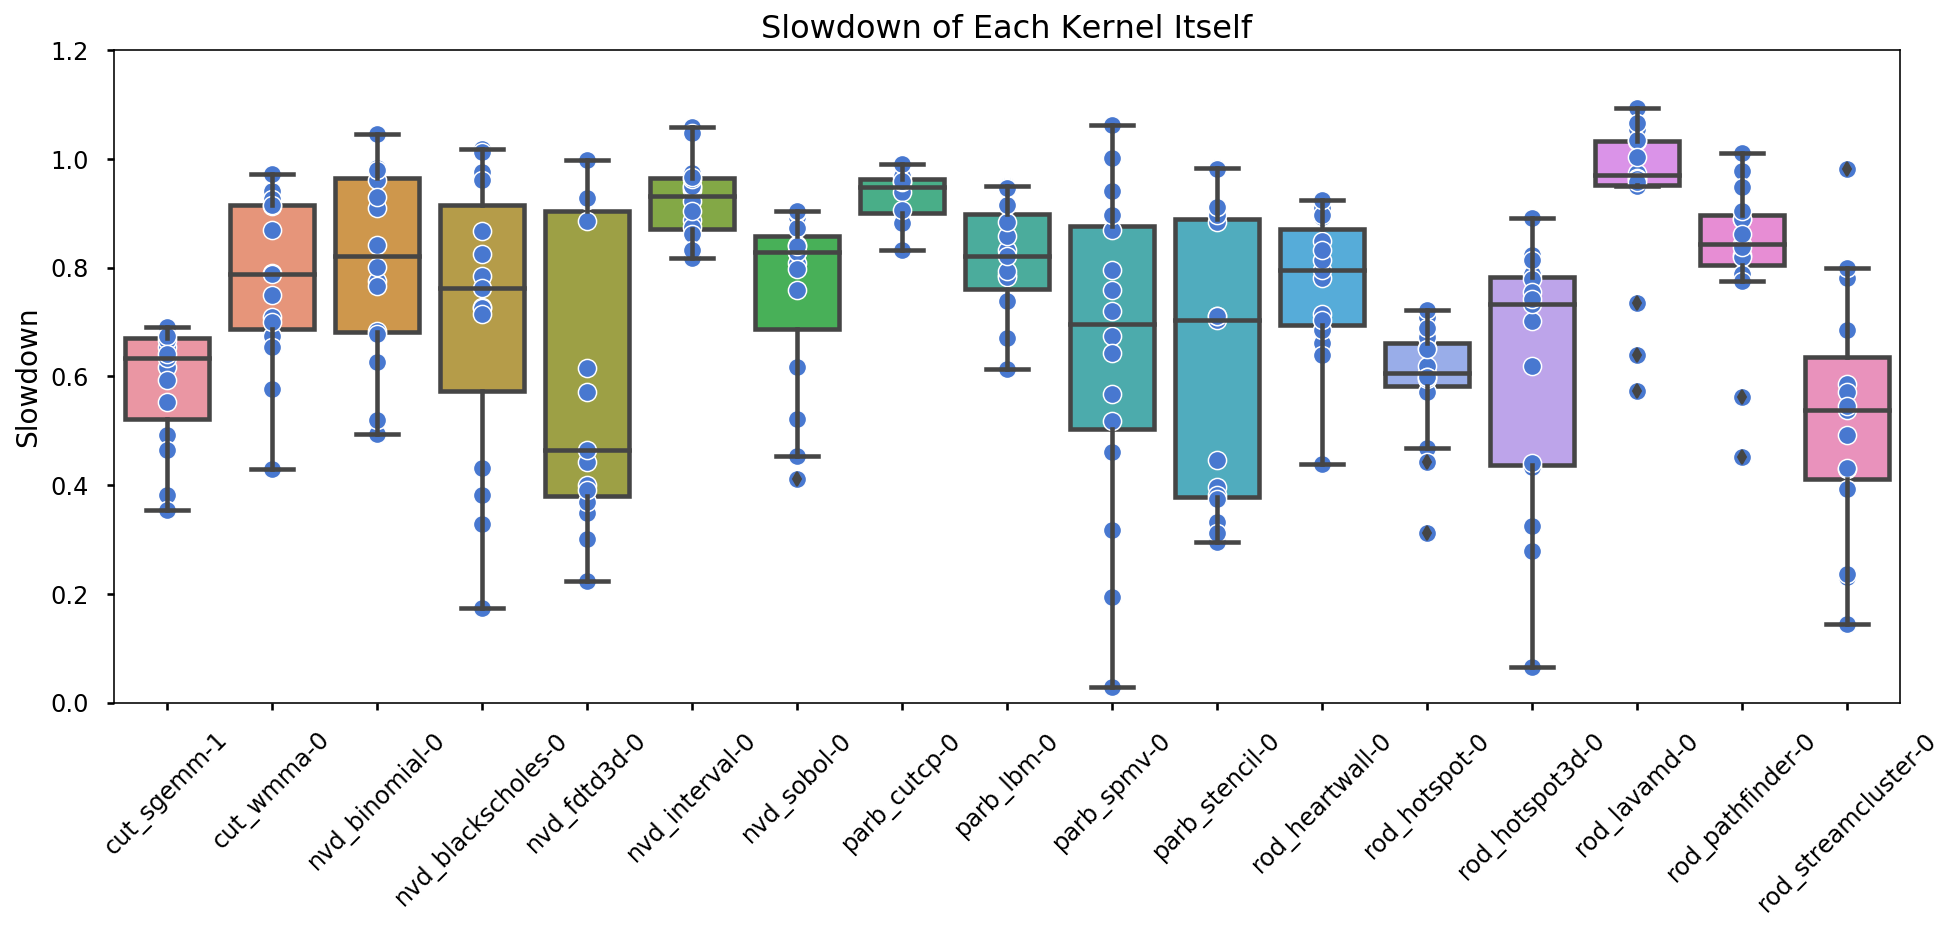

In [85]:
my_boxplot('Slowdown', 'Slowdown of Each Kernel Itself')

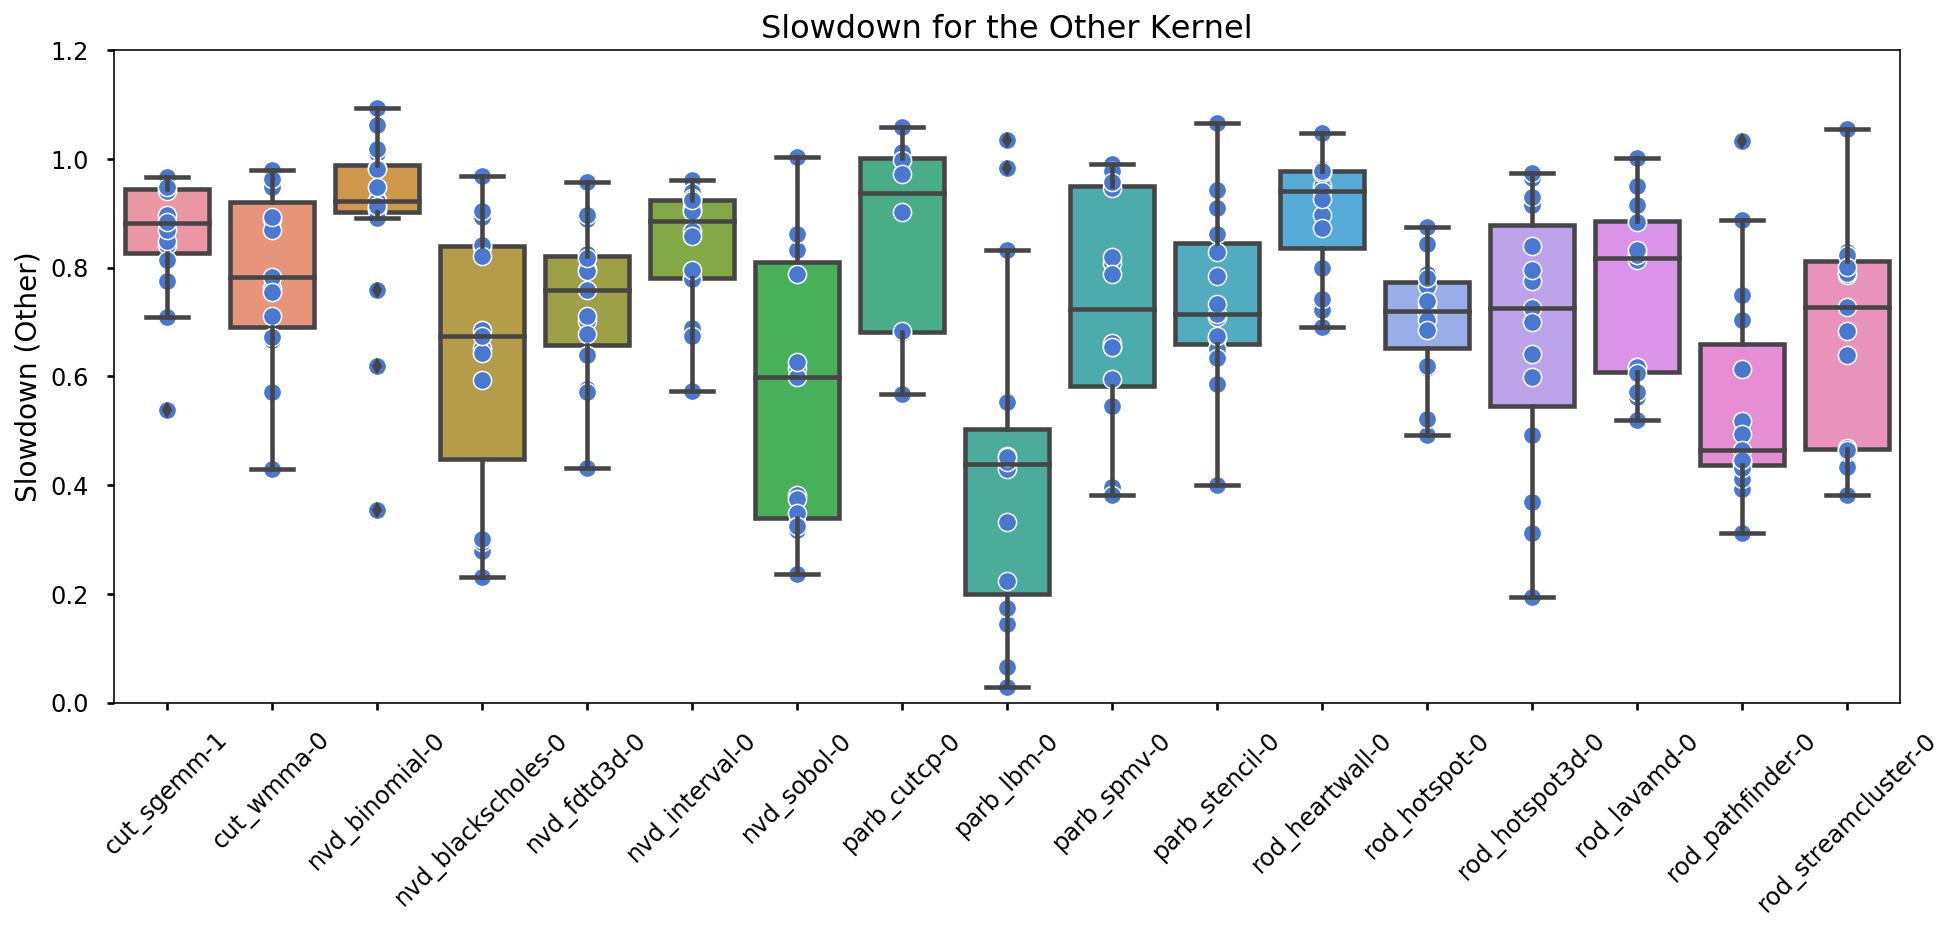

In [86]:
my_boxplot('Slowdown (Other)', 'Slowdown for the Other Kernel')

# Exec context usage for best dynamic

In [83]:
df_dynamic_dist = df_dynamic_show[df_dynamic_show['ws'] > 1.0].copy()

def calc_usage(row, idx):
    return const.get_dominant_usage(row['{}_bench'.format(idx)])[0][1] * row['{}_intra'.format(idx)]

df_dynamic_dist['1_ctx'] = df_dynamic_show.apply(lambda row: calc_usage(row, 1), axis=1)
df_dynamic_dist['2_ctx'] = df_dynamic_show.apply(lambda row: calc_usage(row, 2), axis=1)

(304,)


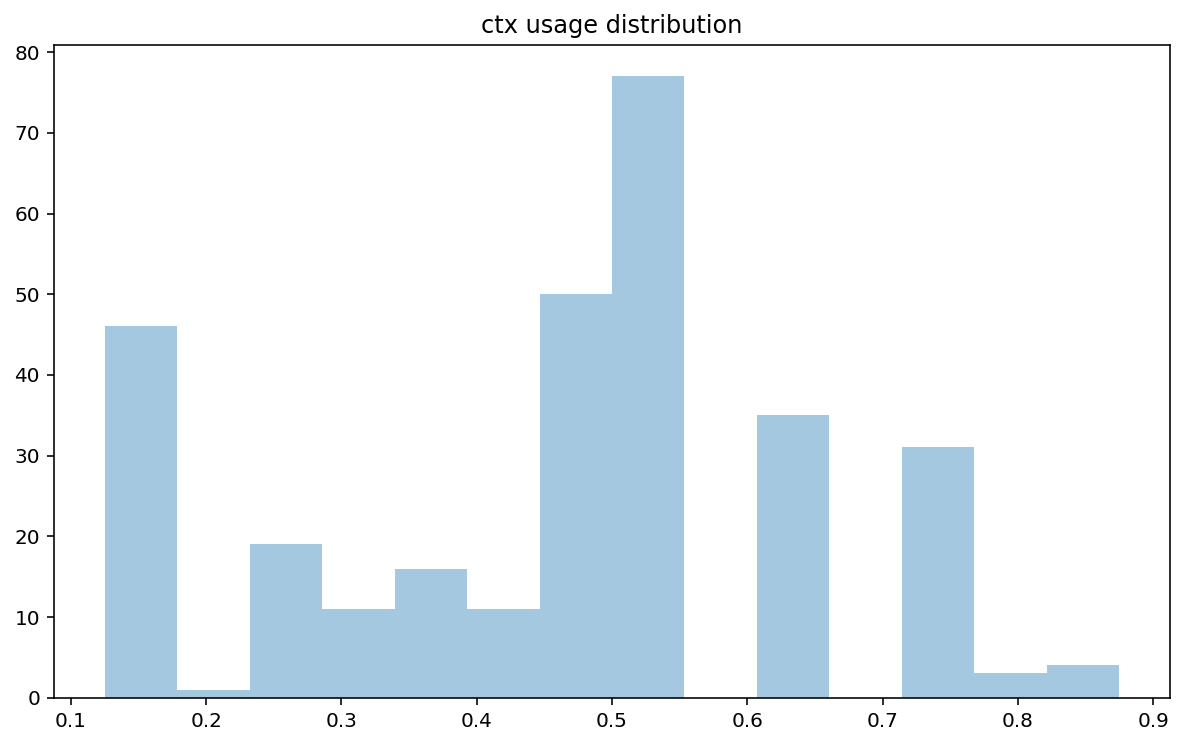

In [84]:
combined_ctx = (df_dynamic_dist['1_ctx'].append(df_dynamic_dist['2_ctx']))
print(combined_ctx.shape)

plt.figure(figsize=(10, 6))
sns.distplot(combined_ctx, hist=True, rug=False, norm_hist=False, kde=False);
# plt.xlim([0.5, 2.5])
plt.title('ctx usage distribution')
plt.show()

In [98]:
def get_max_time(runtimes):
    for t in runtimes:
        if len(t) == 1:
            return t[0] / 1000000


df_dynamic_dist['max_runtime'] = df_dynamic_dist['runtime'].apply(get_max_time)
# print(df_dynamic_dist['max_runtime'])

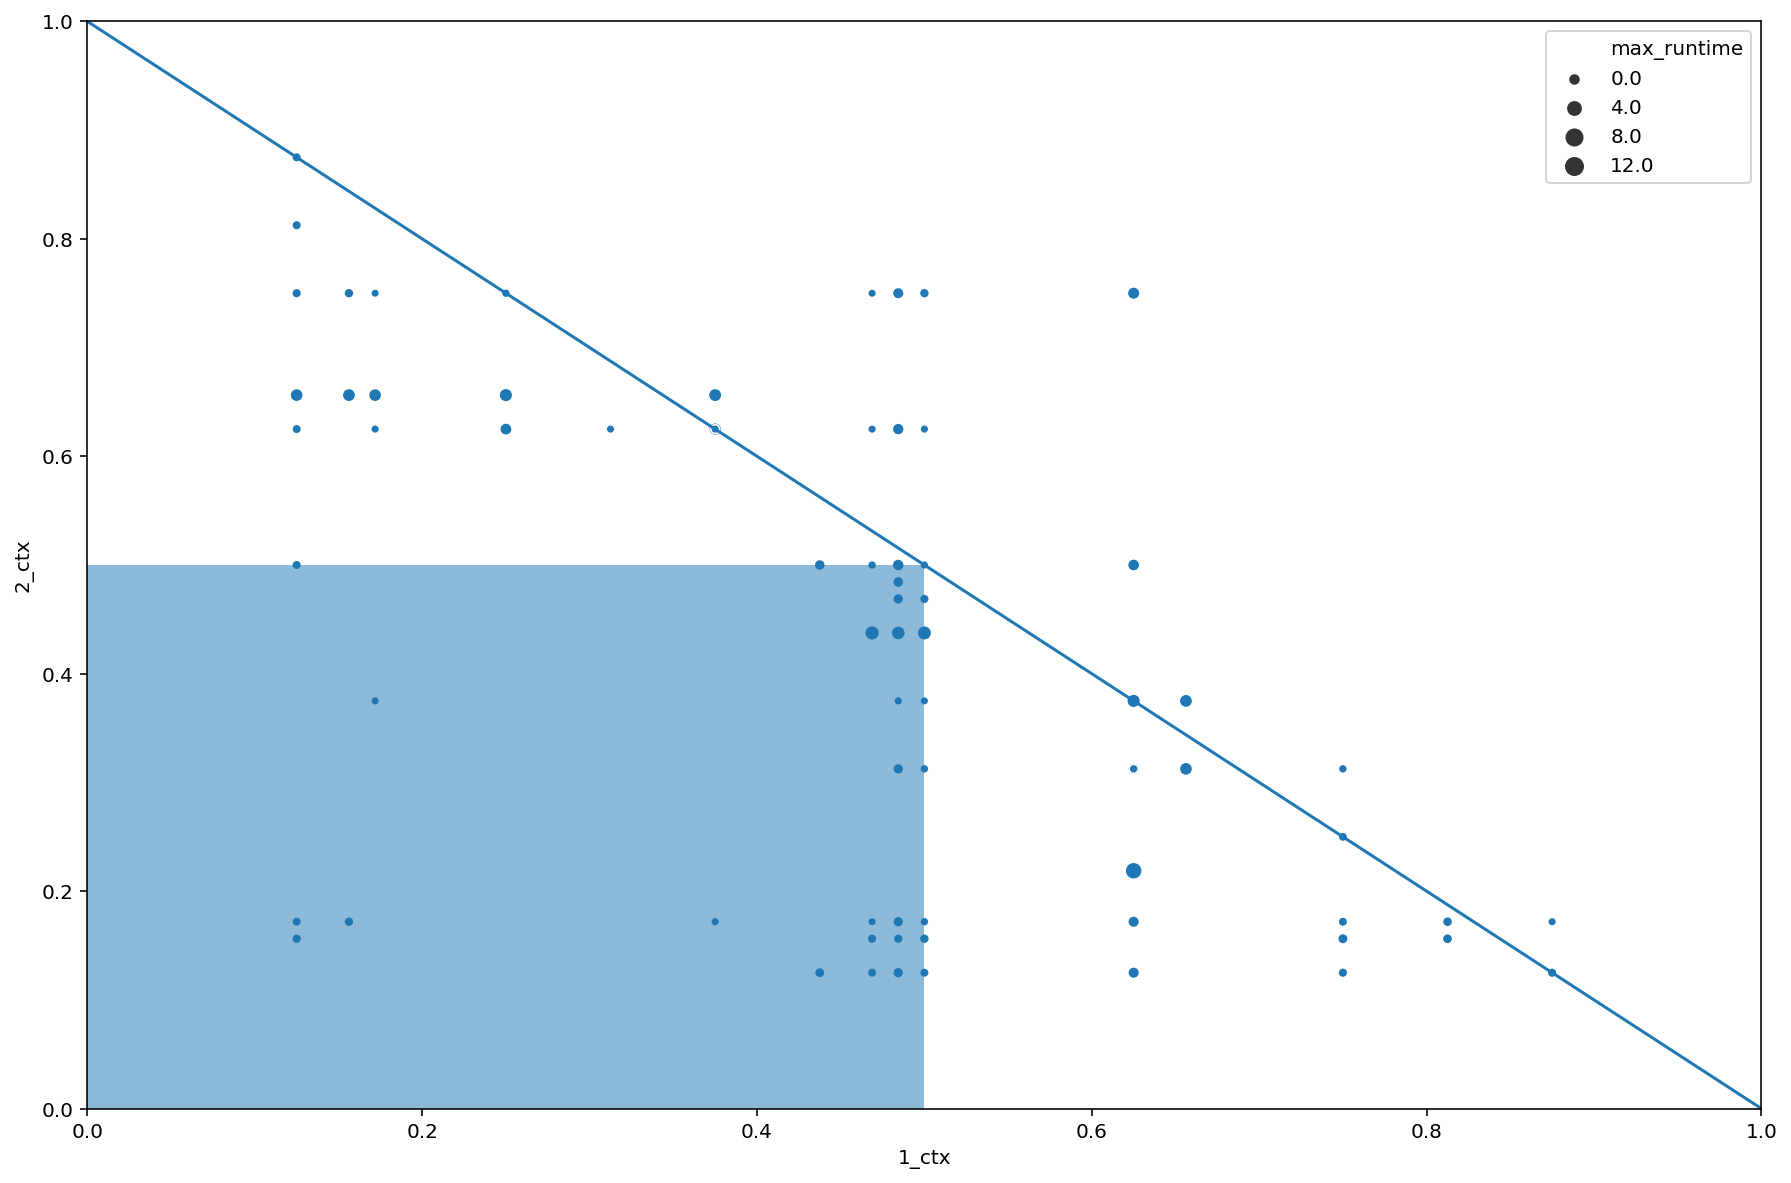

In [99]:
plt.figure(figsize=(15, 10))
sns.scatterplot(x='1_ctx', y='2_ctx', data=df_dynamic_dist, size='max_runtime')

def func_line(x):
    return 1.0 - x

x_values = np.arange(0, 1.1, 0.1)
vf = np.vectorize(func_line)
y_values = vf(x_values)

plt.plot(x_values, y_values)
plt.xlim([0, 1])
plt.ylim([0, 1])

plt.axvspan(0, 0.5, alpha=0.5, ymax=0.5)

plt.show()